# King County House Sales Data Exploration, Analysis, & Modeling
### Kevin Velasco & Alex Shropshire

#### Imports

In [1]:
#PANDAS, NUMPY, MATPLOTLIB, SEABORN, MATH
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from math import sqrt

#STATSMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols

#SCI-KIT LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

#### Data Loading

In [2]:
house_df = pd.read_csv('kc_house_data.csv')
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Initial Correlation Analysis

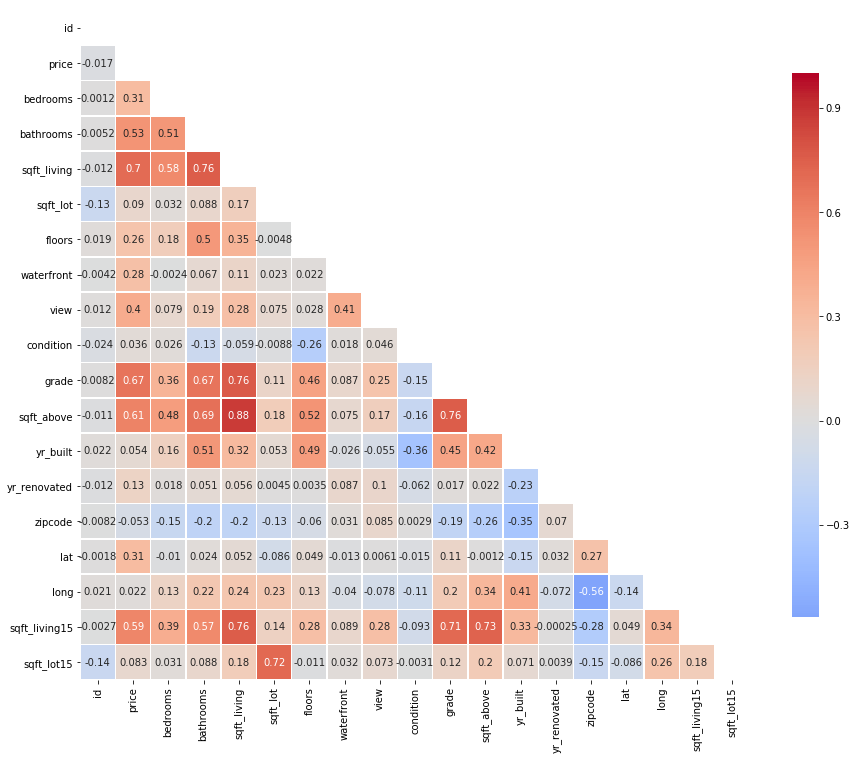

In [3]:
corr = house_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

- Correlation
- Notes
- Here


#### Data Cleaning Notes:
- set waterfront nulls to 0, assumption: nulls mean there is no waterfront view
- set view nulls to 0, assumption: nulls mean nobody has viewed
- set yr_renovated 0's to nulls, assumption: 0 = no renovation has been done
- set sqft_basement '0's & '?' to null, assumption: 0 & ? means no basement exists
- Change date to type datetime64 using pd.Timestamp
- Change zipcode to type str
- Change sqft_basement to type float

In [4]:
house_dff = house_df #to keep integrity of original dataframe, we'll manipulate a copy

In [5]:
#1) Set waterfront nulls to 0, assumption: nulls mean there is no waterfront view
house_dff['waterfront'] = house_dff['waterfront'].fillna(0)

#2) set view nulls to 0, assumption: nulls mean nobody has viewed
house_dff['view'] = house_dff['view'].fillna(0)

#3) set yr_renovated 0's to nulls, assumption: 0 = no renovation has been done
house_dff['yr_renovated'] = house_dff['yr_renovated'].replace(0,np.nan)

#4) set sqft_basement '0's & '?' to null, assumption: 0 & ? means no basement exists. values are in str format
house_dff['sqft_basement'] = house_dff['sqft_basement'].replace('0.0',np.nan)
house_dff['sqft_basement'] = house_dff['sqft_basement'].replace('?',np.nan)

#5) Change date to type datetime64 using pd.Timestamp
house_dff.date = house_dff.date.apply(pd.Timestamp)

#6) Change zipcode to type str
house_dff.zipcode = house_dff.zipcode.astype(str)

#7) Change sqft_basement to type float
house_dff['sqft_basement'] = house_dff['sqft_basement'].astype(float)

In [6]:
#View information of new dataframe house_dff after cleaning steps were completed
house_dff.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,NaN,1955,NaN,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,NaN,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,NaN,1987,NaN,98074,47.6168,-122.045,1800,7503


#### Initial Visualizations: 
1) Histograms of x-variables 

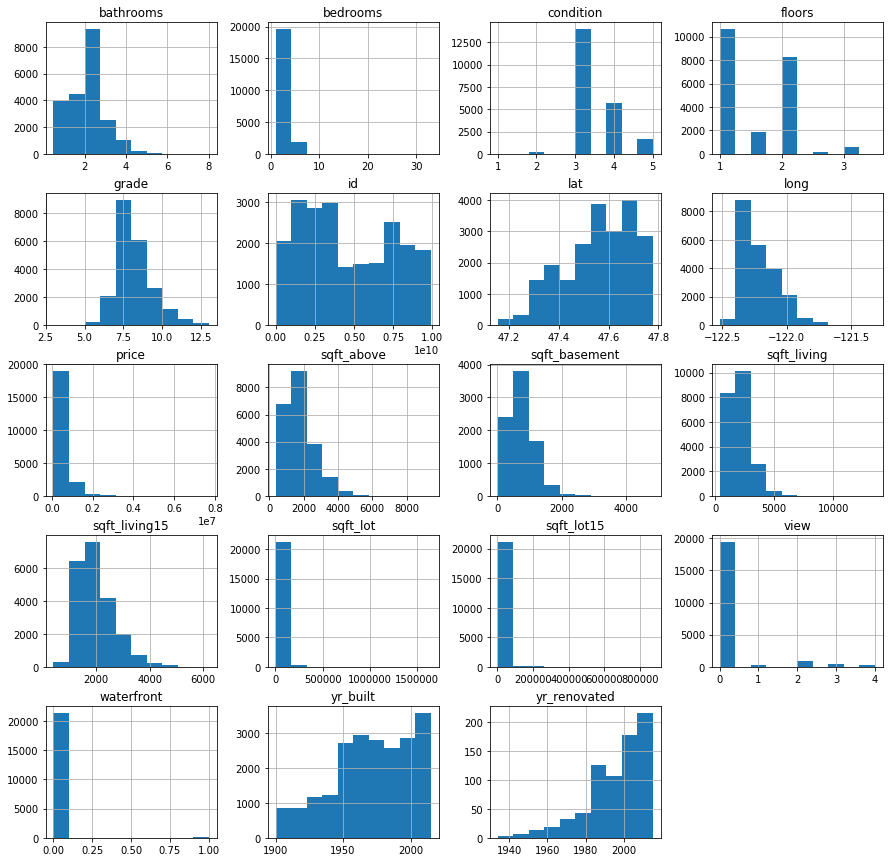

In [7]:
#Plot histograms of our x variables
house_dff.hist(figsize=[15,15]);

#### Initial Visualizations: 
2) Simple Linear Regression Top x-variables vs. Price (y) & R-Squared values

R-squared: 0.49268789904035104


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


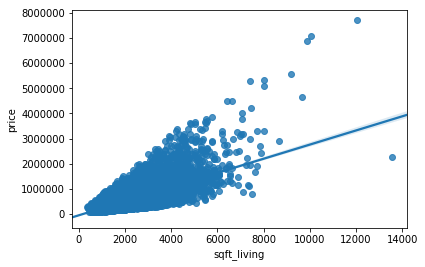

In [8]:
#POTENTIAL TOP 8 FEATURES (inferred from strength of correlation) PLOTTED
y = house_dff['price']
sqft_living_x = house_dff['sqft_living']
model = ols(formula = "y~sqft_living_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_living', y='price', data=house_dff); #r=0.7

R-squared: 0.44615823299735025


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


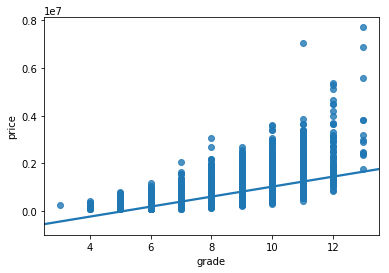

In [9]:
grade_x = house_dff['grade']
model = ols(formula = "y~grade_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='grade', y='price', data=house_dff); #r=0.67

R-squared: 0.3664703472658384


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


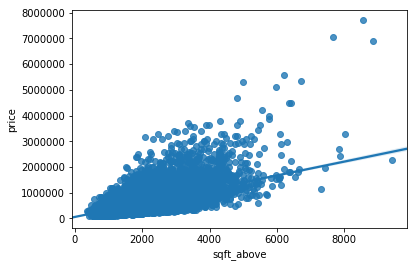

In [10]:
sqft_above_x = house_dff['sqft_above']
model = ols(formula = "y~sqft_above_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_above', y='price', data=house_dff); #r=0.61

R-squared: 0.3425072641720194


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


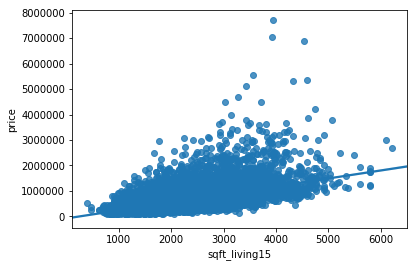

In [11]:
sqft_living15_x = house_dff['sqft_living15']
model = ols(formula = "y~sqft_living15_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_living15', y='price', data=house_dff);#r=0.59

R-squared: 0.27657672267607736


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


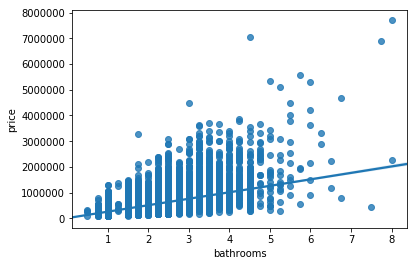

In [12]:
bathrooms_x = house_dff['bathrooms']
model = ols(formula = "y~bathrooms_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='bathrooms', y='price', data=house_dff);#r=0.53

R-squared: 0.154839628812666


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


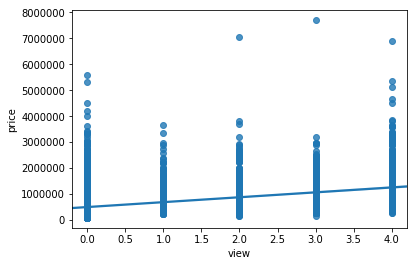

In [13]:
view_x = house_dff['view']
model = ols(formula = "y~view_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='view', y='price', data=house_dff);#r=0.4

R-squared: 0.09534970283730637


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


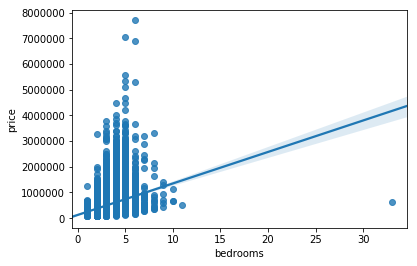

In [14]:
bedrooms_x = house_dff['bedrooms']
model = ols(formula = "y~bedrooms_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='bedrooms', y='price', data=house_dff);#r=0.31

R-squared: 0.09406017561856983


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


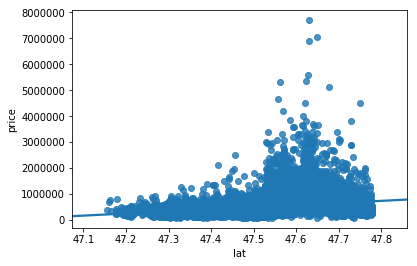

In [15]:
lat_x = house_dff['lat']
model = ols(formula = "y~lat_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='lat', y='price', data=house_dff);#r=0.31

In [16]:
house_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    8317 non-null float64
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10), object(1)
memory u

#### Initial Feature Engineering & Quickly Testing Potential Relationship with Home Price (y)

- Combining # of beds + baths to a single digit
- Creating a binary (yes or no) of whether or not the house was renovated at all
- Combining through addition the square footage of living quarters and the entire lot
- Combining through addition the square footage of living quarters and the entire lot OF CLOSE NEIGHBORS

In [17]:
#Combining # of beds + baths to a single digit
house_dff['bed_bath_sum'] = house_dff['bedrooms'] + house_dff['bathrooms']

R-squared: 0.21843993553827934


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


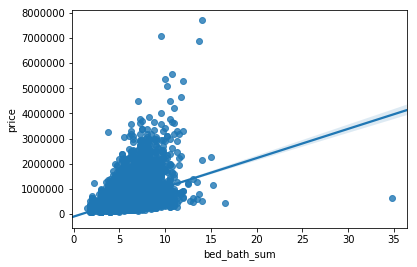

In [18]:
#Testing new feature: bed_bath_sum
bed_bath_sum_x = house_dff['bed_bath_sum']
model = ols(formula = "y~bed_bath_sum_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='bed_bath_sum', y='price', data=house_dff);

In [19]:
#Creating a binary (yes or no) of whether or not the house was renovated at all
house_dff['renovation_yes'] = (~np.isnan(house_dff['yr_renovated'])).astype(int)

R-squared: 0.013816377301946403


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


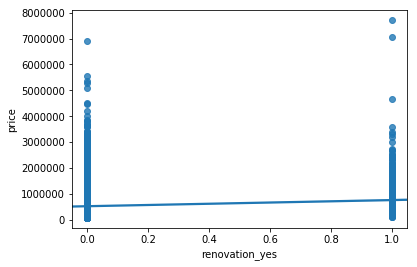

In [20]:
#Testing new feature: renovation_yes
renovation_yes_x = house_dff['renovation_yes']
model = ols(formula = "y~renovation_yes_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='renovation_yes', y='price', data=house_dff);

In [21]:
#Combining through addition the square footage of living quarters and the entire lot
house_dff['sqft_living_plus_lot'] = house_dff['sqft_living'] + house_dff['sqft_lot']

R-squared: 0.011026846496555498


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


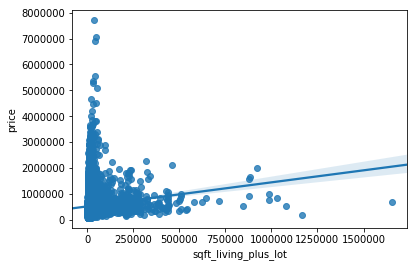

In [22]:
#Testing new feature: sqft_living_plus_lot
sqft_living_plus_lot_x = house_dff['sqft_living_plus_lot']
model = ols(formula = "y~sqft_living_plus_lot_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_living_plus_lot', y='price', data=house_dff);

In [23]:
#Combining through addition the square footage of living quarters and the entire lot OF CLOSE NEIGHBORS
house_dff['sqft_living_plus_lot_15'] = house_dff['sqft_living15'] + house_dff['sqft_lot15']

R-squared: 0.009422826639618465


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


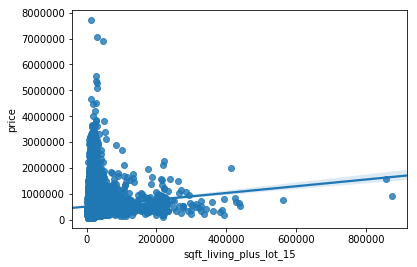

In [24]:
#Testing new feature: sqft_living_plus_lot15
sqft_living_plus_lot_15_x = house_dff['sqft_living_plus_lot_15']
model = ols(formula = "y~sqft_living_plus_lot_15_x", data=house_dff).fit()
print(f"R-squared: {model.rsquared}")
#PLOT
sns.regplot(x='sqft_living_plus_lot_15', y='price', data=house_dff);

##### Initial Feature Engineering Insights:

- Comments
- About new features
- Here

#### Creating MLR Output & Error Functions for Reproduceability (when y='price')

In [39]:
def statsmodels_lin_regress_summary_price(df):
    X = df.drop(['price'], axis=1)
    y = df.price
    predictors = np.asarray(X) #set predictors as numpy array of capital X
    predictors_int = sm.add_constant(predictors) #.add_constant
    model = sm.OLS(y,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
    print(f'Our list of predictors: {X.columns}')
    print(model.summary())

In [40]:
def sklearn_lin_regress_summary_price(df):
    X = df.drop(['price'], axis=1)
    y = df.price
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X)
    np.random.seed(100)
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y)
    lr = LinearRegression()
    lr.fit(X_train,y_train) #fit model
    coeff_array = lr.coef_
    r_2 = metrics.r2_score(y_test, lr.predict(X_test))
    mae = metrics.mean_absolute_error(np.exp(y_test), np.exp(lr.predict(X_test)))
    mse = metrics.mean_squared_error(np.exp(y_test), np.exp(lr.predict(X_test)))
    
    print("Results of Sklearn's Train-Test-Split below:")
    #print(f"Array of coefficients: {coeff_array}")
    print(f'Our list of predictors: {X.columns}')
    print(f"R-squared:{r_2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): ${sqrt(mse)}")

In [41]:
def k_folds_error_summary_price(df,k):
    X = df.drop(['price'], axis=1)
    y = df[['price']]
    k_folds_df = kfolds(df, k)
    MSE_test_errs = []
    MSE_train_errs = []
    MAE_test_errs = []
    MAE_train_errs = []
    k=k
    lr = LinearRegression()
    cv_k_results = cross_val_score(lr, X, y, cv=k, scoring="r2")
    for n in range(k):
        # Split in train and test for the fold
        train = pd.concat([fold for i, fold in enumerate(k_folds_df) if i!=n])
        test = k_folds_df[n]
        # Fit a linear regression model
        lr.fit(train[X.columns], train[y.columns])
        #Evaluate Train and Test Errors
        y_hat_train = lr.predict(train[X.columns])
        y_hat_test = lr.predict(test[X.columns])
        train_residuals = np.exp(y_hat_train) - np.exp(train[y.columns])
        test_residuals = np.exp(y_hat_test) - np.exp(test[y.columns])
        MSE_train_errs.append(np.mean(train_residuals.astype(float)**2))
        MSE_test_errs.append(np.mean(test_residuals.astype(float)**2))
        MAE_train_errs.append(np.mean(abs(train_residuals.astype(float))))
        MAE_test_errs.append(np.mean(abs(test_residuals.astype(float))))
    print(f'Our list of predictors: {X.columns}')
    print(f'Our R-Squared when k={k} is:{cv_k_results}')
    print(f" Our average training MAE when k={k} is:{np.mean(MAE_train_errs)}")
    #print(f" Our average test MAE when k={k} is:{np.mean(MAE_test_errs)}")
    print(f" Our average training MSE when k={k} is:{np.mean(MSE_train_errs)}")
    #print(f" Our average test MSE when k={k} is:{np.mean(MSE_test_errs)}")
    print(f" Our average training RMSE when k={k} is:{sqrt(np.mean(MSE_train_errs))}")
    #print(f" Our average test RMSE when k={k} is:{sqrt(np.mean(MSE_test_errs))}")

#### Benchmark Model: 1st Multiple Linear Regression using Top 6 Features

In [50]:
house_top6_df = house_dff[['price','sqft_living','grade','sqft_above','sqft_living15','bathrooms','view']]
#df[['log_price','log_sqft_living', 'grade', 'log_sqft_living15', 'bathrooms',
#   'view','distance_from_flatiron','yr_last_constructed']]

In [51]:
house_top6_df.head()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view
0,221900.0,1180,7,1180,1340,1.00,0.0
1,538000.0,2570,7,2170,1690,2.25,0.0
2,180000.0,770,6,770,2720,1.00,0.0
3,604000.0,1960,7,1050,1360,3.00,0.0
4,510000.0,1680,8,1680,1800,2.00,0.0


In [52]:
#statsmodels output
statsmodels_lin_regress_summary_price(house_top6_df)

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     4879.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:13:58   Log-Likelihood:            -2.9814e+05
No. Observations:               21597   AIC:                         5.963e+05
Df Residuals:                   21590   BIC:                         5.963e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0

In [53]:
#sci-kit learn output
sklearn_lin_regress_summary_price(house_top6_df)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
house_top6_df.isna().sum()

price            0
sqft_living      0
grade            0
sqft_above       0
sqft_living15    0
bathrooms        0
view             0
dtype: int64

In [ ]:
#k-folds cross validation output
k_folds_error_summary_price(house_top6_df,5)

#### 1st MLR Benchmarks & Insights (Price vs. Top 6 Features)
###### Top 6: 'sqft_living','grade','sqft_above','sqft_living15','bathrooms','view'

In [25]:
#ADD A PREDICT PRICE FUNCTION
def predict_price():
    